<a href="https://colab.research.google.com/github/RodrigoGuedesDP/Programacion_101/blob/main/IA_Fundamentals/pr_ctica_n_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Enunciado

En sus respectivos grupos, implemente el método de búsqueda Hill Climbing y Simulated Annealing aplicado a algun **problema de automatización**, puede considerar alguno de estos:

*   N-queens
*   Problema de la mochila.
*   Vehicle Routing Problem.
*   Portfolio optimization.
*   Job shop.
*   Flow shop.







## Problema de Optimización: Vehicle Routing Problem.


Ingrese el número de locales de distribución: 10
Ingrese el mayor valor de X: 10
Ingrese el mayor valor de Y: 10
La ubicación de los locales de distribución en el plano es: [(0, 0), (4, 7), (1, 2), (10, 6), (2, 4), (8, 4), (1, 6), (7, 5), (9, 5), (7, 2)]

Hill Climbing:
Mejor ruta encontrada: [7, 3, 8, 5, 9, 0, 2, 4, 6, 1]
Distancia total: 28.98
Tiempo de ejecución: 0.03641843795776367 segundos

Simulated Annealing:
Mejor ruta encontrada: [2, 4, 6, 1, 7, 3, 8, 5, 9, 0]
Distancia total: 28.98
Tiempo de ejecución: 0.037018775939941406 segundos


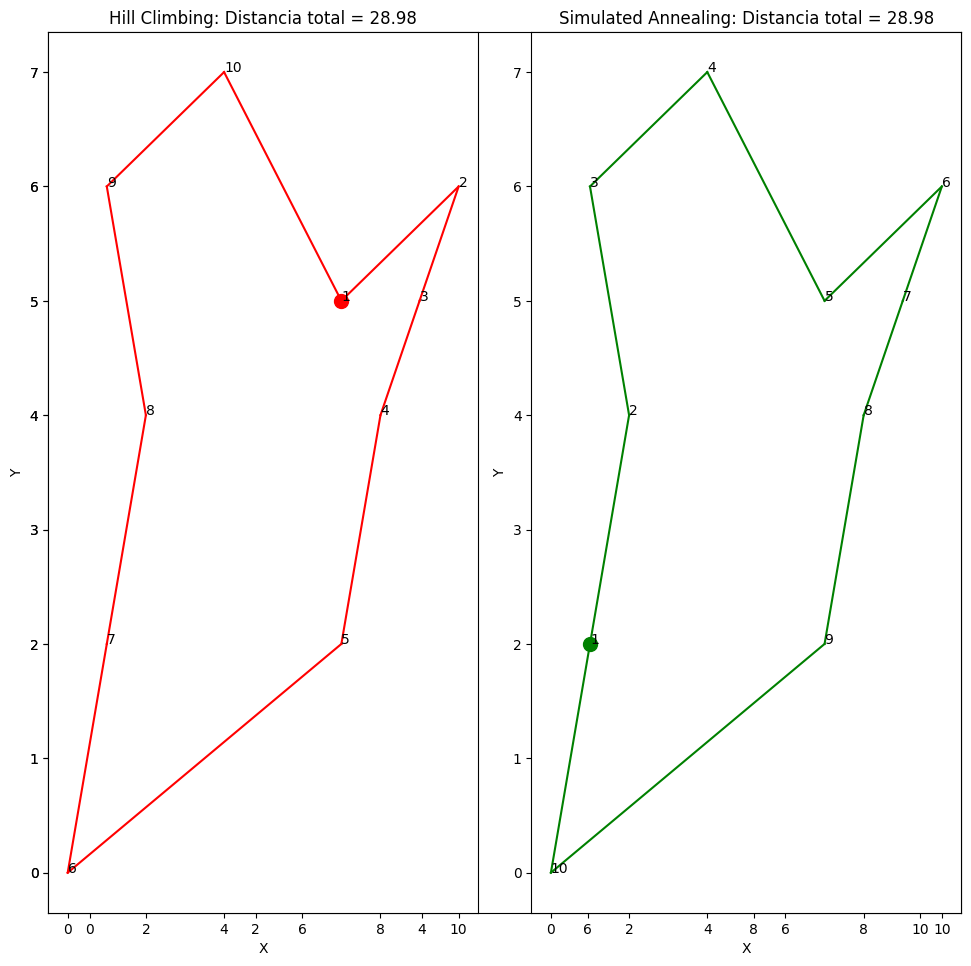

In [ ]:
# Importar liberías necesarias.

import numpy as np
import matplotlib.pyplot as plt
import random
from itertools import permutations
import time
import math

# Definir una función para hallar la distancia euclidiana entre dos puntos de reparto.

def distance(point1, point2):
  return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Definir una función para calcular la distancia total de la ruta, regresando al punto de inicio.

def total_distance(route, points):
  total_dist = 0
  for i in range(len(route) - 1):
    total_dist += distance(points[route[i]], points[route[i+1]])
  total_dist += distance(points[route[-1]], points[route[0]])
  return round(total_dist, 2)

# Definir una función para generar una ruta intercambiando nodos aleatorios.

def generate_neighbor(route):
  neighbor = route[:]
  i, j = random.sample(range(len(route)), 2)
  neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
  return neighbor

# Definir la función de Hill Climbing.

def hill_climbing(points, max_iterations=1000):
  num_points = len(points)
  current_route = list(range(num_points))
  random.shuffle(current_route)
  current_distance = total_distance(current_route, points)

  start_time = time.time()

  for _ in range(max_iterations):
    neighbor_route = generate_neighbor(current_route)
    neighbor_distance = total_distance(neighbor_route, points)

    if neighbor_distance < current_distance:
      current_route = neighbor_route
      current_distance = neighbor_distance

  end_time = time.time()
  execution_time = end_time - start_time

  return current_route, current_distance, execution_time

# Definir la función de Simulated Annealing.

def simulated_annealing(points, initial_temperature, cooling_rate, max_iterations):
  num_points = len(points)
  current_route = list(range(num_points))
  random.shuffle(current_route)
  current_distance = total_distance(current_route, points)

  start_time = time.time()

  temperature = initial_temperature

  for _ in range(max_iterations):
    neighbor_route = generate_neighbor(current_route)
    neighbor_distance = total_distance(neighbor_route, points)

    if neighbor_distance < current_distance:
      current_route = neighbor_route
      current_distance = neighbor_distance
    else:
      probability = math.exp(-(neighbor_distance - current_distance) / temperature)
      if random.random() < probability:
        current_route = neighbor_route
        current_distance = neighbor_distance
    temperature *= cooling_rate

  end_time = time.time()
  execution_time = end_time - start_time

  return current_route, current_distance, execution_time

# Dar una ubicación aleatoria para los puntos de distribución.

def generate_random_points(num_pairs, max_x, max_y):
  points = []
  for _ in range(num_pairs):
    x = random.randint(0, max_x)
    y = random.randint(0, max_y)
    points.append((x, y))
  return points

try:
  num_pairs = int(input("Ingrese el número de locales de distribución: "))
except ValueError:
  print("Input inválido. Por favor ingrese un número.")
  exit()

try:
  max_x = int(input("Ingrese el mayor valor de X: "))
  max_y = int(input("Ingrese el mayor valor de Y: "))
except ValueError:
  print("Input inválido. Por favor ingrese un número.")
  exit()

points = generate_random_points(num_pairs, max_x, max_y)
print(f"La ubicación de los locales de distribución en el plano es: {[point for point in points]}")

# Ejecución, ploteo de los puntos y detalle de distancia óptima.

print("\nHill Climbing:")
best_route_hc, best_distance_hc, execution_time_hc = hill_climbing(points)
print(f"Mejor ruta encontrada: {best_route_hc}")
print(f"Distancia total: {best_distance_hc}")
print(f"Tiempo de ejecución: {execution_time_hc} segundos")

print("\nSimulated Annealing:")
initial_temperature = 1000
cooling_rate = 0.95
max_iterations_sa = 1000
best_route_sa, best_distance_sa, execution_time_sa = simulated_annealing(points, initial_temperature, cooling_rate, max_iterations_sa)
print(f"Mejor ruta encontrada: {best_route_sa}")
print(f"Distancia total: {best_distance_sa}")
print(f"Tiempo de ejecución: {execution_time_sa} segundos")

x = [point[0] for point in points]
y = [point[1] for point in points]

plt.figure(figsize=(max_x, max_y))
plt.scatter(x, y, color='blue')

plt.subplot(1, 2, 1)
for i in range(len(best_route_hc) - 1):
  plt.plot([points[best_route_hc[i]][0], points[best_route_hc[i+1]][0]],
           [points[best_route_hc[i]][1], points[best_route_hc[i+1]][1]],
           color='red')

plt.plot([points[best_route_hc[-1]][0], points[best_route_hc[0]][0]],
         [points[best_route_hc[-1]][1], points[best_route_hc[0]][1]],
         color='red')

plt.scatter(points[best_route_hc[0]][0], points[best_route_hc[0]][1], color='red', marker='o', s=100)

for i, point_index in enumerate(best_route_hc):
    plt.annotate(str(i+1), (points[point_index][0], points[point_index][1]))

plt.title(f"Hill Climbing: Distancia total = {best_distance_hc}")
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1, 2, 2)
for i in range(len(best_route_sa) - 1):
  plt.plot([points[best_route_sa[i]][0], points[best_route_sa[i+1]][0]],
           [points[best_route_sa[i]][1], points[best_route_sa[i+1]][1]],
           color='green')

plt.plot([points[best_route_sa[-1]][0], points[best_route_sa[0]][0]],
         [points[best_route_sa[-1]][1], points[best_route_sa[0]][1]],
         color='green')

plt.scatter(points[best_route_sa[0]][0], points[best_route_sa[0]][1], color='green', marker='o', s=100)

for i, point_index in enumerate(best_route_sa):
    plt.annotate(str(i+1), (points[point_index][0], points[point_index][1]))

plt.title(f"Simulated Annealing: Distancia total = {best_distance_sa}")
plt.xlabel("X")
plt.ylabel("Y")

plt.tight_layout()
plt.show()